In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_questions_ymd = pd.read_csv('./data/silver/df_questions_by_period_YYYY-MM-DD.csv', index_col=0)
df_meetings_ymd = pd.read_csv('./data/silver/df_meetings_by_period_YYYY-MM-DD.csv', index_col=0)

df_meps = pd.read_csv('./data/silver/mep_membership_timeline.csv')

In [17]:
all_periods = sorted(set(df_questions_ymd.columns.tolist() + df_meetings_ymd.columns.tolist()))

# Fill missing periods with 0
df_questions = df_questions_ymd.reindex(all_periods, axis=1, fill_value=0)
df_meetings = df_meetings_ymd.reindex(all_periods, axis=1, fill_value=0)

# Combine dataframes



In [4]:
# I need to transform the columns into rows
df_questions_melted = df_questions.melt(ignore_index=False, var_name='date', value_name='questions')
df_meetings_melted = df_meetings.melt(ignore_index=False, var_name='date', value_name='meetings')

# Reset index to handle duplicate indices
df_questions_melted = df_questions_melted.reset_index()
df_meetings_melted = df_meetings_melted.reset_index()

# now join the two dataframes
df_combined = pd.merge(df_questions_melted, df_meetings_melted, 
                      on=['member_id', 'date'])

# Aggregate the data by week
df_combined['date'] = pd.to_datetime(df_combined['date']).dt.strftime('%Y-%U')
df_combined = df_combined.groupby(['member_id', 'date']).sum().reset_index()


# Add MEP data

In [8]:
df_meps

,ID,date,COUNTRY,- MEMBER_PARLIAMENT,POLITICAL_GROUP,EU_POLITICAL_GROUP - MEMBER,NATIONAL_CHAMBER - MEMBER,EU_INSTITUTION - MEMBER,DELEGATION_PARLIAMENTARY_ASSEMBLY - MEMBER_SUBSTITUTE,COMMITTEE_PARLIAMENTARY_STANDING - MEMBER_SUBSTITUTE,...,EU_POLITICAL_GROUP - PRESIDENT_CO,- PRESIDENT_PARLIAMENT_STOA,NATIONAL_CHAMBER - TREASURER_CO,- PRESIDENT_ACTING,EU_INSTITUTION - PRESIDENT_ACTING,DELEGATION_PARLIAMENTARY_ASSEMBLY - PRESIDENT_ACTING,WORKING_GROUP -,EU_POLITICAL_GROUP - SECRETARY_BUREAU,EU_POLITICAL_GROUP - PRESIDENT_VICE,DELEGATION_PARLIAMENTARY_ASSEMBLY - OBSERVER
0,1,1991-35,DEU,1.0,484.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1991-36,DEU,1.0,484.0,1.0,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1991-36,DEU,1.0,484.0,1.0,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1991-40,DEU,1.0,484.0,1.0,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1991-40,DEU,1.0,484.0,1.0,1.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66628,999,1993-06,DEU,1.0,492.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66629,999,1993-06,DEU,1.0,492.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66630,999,1994-05,DEU,1.0,492.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66631,999,1994-05,DEU,1.0,492.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_combined.sort_values(by='meetings', ascending=False)


,member_id,date,questions,meetings
221277,96761.0,2023-10,0,146
15652,1927.0,2022-06,0,91
15697,1927.0,2022-51,0,84
15687,1927.0,2022-41,1,80
738649,197449.0,2024-17,0,70
...,...,...,...,...
596314,185771.0,2023-53,0,0
596313,185771.0,2023-52,0,0
596312,185771.0,2023-51,0,0
596311,185771.0,2023-50,0,0


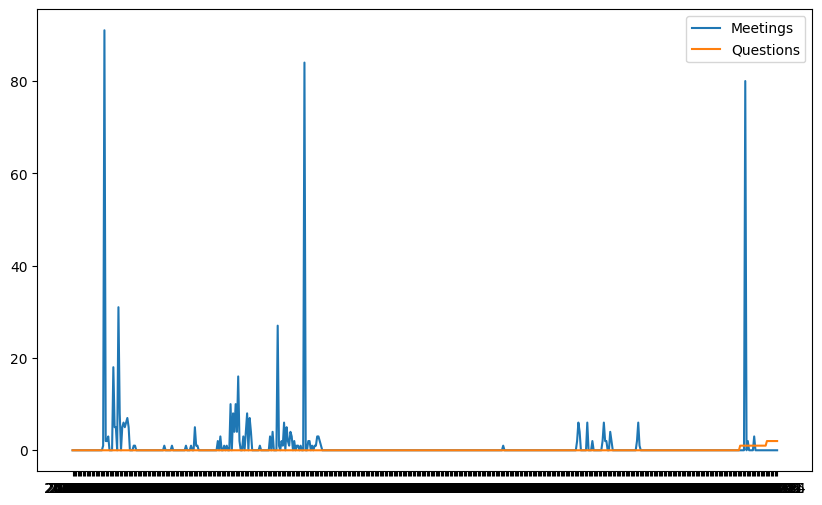

In [67]:

df_to_plot = df_combined[df_combined['member_id'] == 1927.0]

plt.figure(figsize=(10, 6))
plt.plot(df_to_plot['date'], df_to_plot['meetings'], label='Meetings')
plt.plot(df_to_plot['date'], df_to_plot['questions'], label='Questions')
plt.legend()
plt.show()

